## Project 1

In [623]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [624]:
gdp_df = pd.read_csv('UNdata_Export_20220916_032711788.csv')

In [625]:
gdp_df.head(10)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2019,2065.036398,NaN
1,Afghanistan,2018,2033.779002,NaN
2,Afghanistan,2017,2058.383832,NaN
3,Afghanistan,2016,2057.062164,NaN
4,Afghanistan,2015,2068.265904,NaN
5,Afghanistan,2014,2102.385234,NaN
6,Afghanistan,2013,2116.465454,NaN
7,Afghanistan,2012,2075.491747,NaN
8,Afghanistan,2011,1904.559799,NaN
9,Afghanistan,2010,1957.029338,NaN


In [626]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6870 entries, 0 to 6869
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  6870 non-null   object 
 1   Year             6870 non-null   object 
 2   Value            6868 non-null   float64
 3   Value Footnotes  1 non-null      float64
dtypes: float64(2), object(2)
memory usage: 214.8+ KB


In [627]:
#Look at the last 5 rows. Do you see a problem?
gdp_df.tail(5)

,Country or Area,Year,Value,Value Footnotes
6865,Zimbabwe,1992,3054.889178,NaN
6866,Zimbabwe,1991,3426.598094,NaN
6867,Zimbabwe,1990,3324.348171,NaN
6868,footnoteSeqID,Footnote,NaN,NaN
6869,2,"Excludes South Sudan after July 9, 2011.",NaN,NaN


In [628]:
#Redo the read_csv() call to correct this issue - do not modify the original csv file.
gdp_df = pd.read_csv('UNdata_Export_20220916_032711788.csv', skipfooter = 2, engine = 'python')
gdp_df.tail()

,Country or Area,Year,Value,Value Footnotes
6863,Zimbabwe,1994,3263.934978,NaN
6864,Zimbabwe,1993,3033.504852,NaN
6865,Zimbabwe,1992,3054.889178,NaN
6866,Zimbabwe,1991,3426.598094,NaN
6867,Zimbabwe,1990,3324.348171,NaN


In [629]:
#Drop the 'Value Footnotes' column and rename the remaining columns to 'Country', 'Year', and 'GDP_Per_Capita'.
gdp_df = gdp_df.drop(columns = 'Value Footnotes').rename(columns = {'Country or Area':'Country', 'Value':'GDP_Per_Capita'})
gdp_df.head()

,Country,Year,GDP_Per_Capita
0,Afghanistan,2019,2065.036398
1,Afghanistan,2018,2033.779002
2,Afghanistan,2017,2058.383832
3,Afghanistan,2016,2057.062164
4,Afghanistan,2015,2068.265904


In [630]:
#How many rows and columns does gdp_df have? What are the data types of its columns? 
#If any of the columns are not the expected types, figure out why and fix it.
gdp_df.shape


(6868, 3)

In [631]:
gdp_df.dtypes

Country            object
Year                int64
GDP_Per_Capita    float64
dtype: object

In [632]:
#Which years are represented in this dataset? Take a look at the number of observations per year. 
#What do you notice?
gdp_df['Year'].value_counts()
#I notice that the number of observations per year increases since 1990

2017    238
2016    238
2015    238
2014    238
2013    238
2012    237
2011    237
2018    237
2010    236
2009    236
2008    235
2007    235
2006    235
2005    234
2004    234
2003    233
2002    233
2001    232
2000    231
2019    231
1999    224
1998    223
1997    223
1996    221
1995    221
1994    214
1993    212
1992    209
1991    208
1990    207
Name: Year, dtype: int64

In [633]:
#How many countries are represented in this dataset? there are 238 countries represented in this dataset

#Which countries are least represented in the dataset? Djibouti and Turks and Caicos Islands
gdp_df1 = gdp_df.groupby('Country').count()
gdp_df1[gdp_df1['Year']<10]

#Why do you think these countries have so few observations? Because they have very low population & growth
print(gdp_df[gdp_df['Country'] == 'Djibouti']) 
print(gdp_df[gdp_df['Country'] == 'Turks and Caicos Islands']) 

pd.set_option('display.max_rows', None)

print(gdp_df.groupby('Country').count())
print(gdp_df.groupby('Country').count().shape)
print(gdp_df.groupby('Country').count().min())

       Country  Year  GDP_Per_Capita
1477  Djibouti  2019     5534.749116
1478  Djibouti  2018     5214.088499
1479  Djibouti  2017     4885.220563
1480  Djibouti  2016     4709.549234
1481  Djibouti  2015     4488.827214
1482  Djibouti  2014     4238.996239
1483  Djibouti  2013     4028.446052
                       Country  Year  GDP_Per_Capita
6413  Turks and Caicos Islands  2019    29253.376603
6414  Turks and Caicos Islands  2018    28162.384154
6415  Turks and Caicos Islands  2017    27061.318758
6416  Turks and Caicos Islands  2016    28174.482568
6417  Turks and Caicos Islands  2015    26691.619368
6418  Turks and Caicos Islands  2014    24393.400501
6419  Turks and Caicos Islands  2013    22850.892480
6420  Turks and Caicos Islands  2012    23050.123871
6421  Turks and Caicos Islands  2011    23756.935131
                                                    Year  GDP_Per_Capita
Country                                                                 
Afghanistan                 

In [634]:
#Create a new dataframe by subsetting gdp_df to just the year 2014. Call this new dataframe gdp_2014.
gdp_2014 = gdp_df[gdp_df['Year'] == 2014]

In [635]:
#Use .describe() to find the summary statistics for GDP per capita in 2014.
gdp_2014.describe()

,Year,GDP_Per_Capita
count,238.0,238.000000
mean,2014.0,19766.710348
std,0.0,20983.869623
min,2014.0,822.610458
25%,2014.0,4753.110934
50%,2014.0,12209.385755
75%,2014.0,26803.610474
max,2014.0,156514.133850


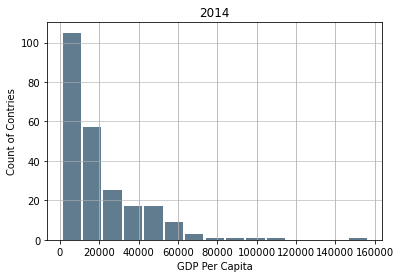

In [636]:
#Create a histogram of GDP Per Capita numbers for 2014 (you may wish to adjust the number of bins for your histogram). 
#How would you describe the shape of the distribution? Skewed to the right 
gdp_2014['GDP_Per_Capita'].plot.hist(grid=True, bins=15, rwidth=0.9,
                   color='#607c8e')
plt.title('2014')
plt.xlabel('GDP Per Capita')
plt.ylabel('Count of Contries')
plt.grid(axis='y', alpha=0.75)

In [637]:
#Find the top 5 counties and bottom 5 countries by GDP per capita in 2014.
gdp_2014_1 = gdp_2014.sort_values('GDP_Per_Capita')
print(gdp_2014_1.head())
print(gdp_2014_1.tail())

                       Country  Year  GDP_Per_Capita
1047  Central African Republic  2014      822.610458
827                    Burundi  2014      886.235777
3781                    Malawi  2014     1027.208496
1422           Dem. Rep. Congo  2014     1029.790785
4528                     Niger  2014     1127.615541
               Country  Year  GDP_Per_Capita
561            Bermuda  2014    77361.104881
5464         Singapore  2014    87808.663157
5138             Qatar  2014    95578.416973
3691        Luxembourg  2014   108760.916030
3721  Macao SAR, China  2014   156514.133850


Now, return to the full dataset, gdp_df. 
Pivot the data for 1990 and 2017 (using the pandas .pivot_table() method or another method) so that each row corresponds to a country, each column corresponds to a year, and the values in the table give the GDP_Per_Capita amount. Drop any rows that are missing values for either 1990 or 2017. Save the result to a dataframe named gdp_pivoted.

In [638]:
gdp_pivoted = gdp_df[(gdp_df["Year"] >= 1990) & (gdp_df["Year"] <= 2017 )]
gdp_pivoted = gdp_pivoted.pivot(index='Country', columns='Year', values='GDP_Per_Capita')
gdp_pivoted = gdp_pivoted.dropna(axis=0)
gdp_pivoted.shape
gdp_pivoted.head()

Year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Country,,,,,,,,,,,,,,,,,,,,,
Albania,4842.734635,3507.746654,3275.444336,3610.520633,3934.375728,4486.152092,4924.905836,4414.631173,4834.778357,5492.654212,...,9944.233283,10346.864199,10783.816180,11088.087801,11263.851342,11397.576226,11623.866679,11916.422315,12331.127754,12811.759436
Algeria,8746.352901,8431.385028,8383.770248,8027.376688,7792.085182,7935.179841,8116.962721,8074.759953,8360.150339,8506.345679,...,10796.901320,10782.361398,10970.705149,11078.240516,11233.534926,11319.097949,11512.705405,11696.963757,11826.164666,11737.409353
Angola,5783.429064,5649.782130,5148.252824,3788.508107,3717.366881,4139.640473,4551.651329,4728.157560,4792.683851,4740.669833,...,7864.375304,7643.493749,7692.434616,7675.445768,8036.690482,8140.527851,8239.828837,8036.410610,7568.997643,7310.901738
Antigua and Barbuda,15459.551675,15586.896172,15497.464744,15991.764201,16697.248772,15628.396992,16303.723892,16828.640823,17258.964856,17551.305968,...,23130.553123,20046.839017,18205.985369,17604.417102,17965.502327,17641.542533,18104.241470,18595.084904,19417.964819,19840.076123
Arab World,9694.667544,9651.626577,9933.531454,9927.649928,9957.387061,9913.934988,10136.058519,10311.064917,10624.718674,10606.027497,...,13261.601944,13063.094140,13347.112066,13531.438796,14032.961703,14155.876986,14219.562395,14441.436785,14663.549625,14555.474921


Create a new column in gdp_pivoted named Percent_Change. This column should contain the percent change in GDP_Per_Capita from 1990 to 2017. Hint: Percent change is calculated as 100*(New Value - Old Value) / Old Value.

In [639]:
#gdp_pivoted['Percent_Change'] = gdp_pivoted.pct_change()
gdp_pivoted['Percent_Change'] = ((gdp_pivoted[2017] - gdp_pivoted[1990]) / gdp_pivoted[1990]) * 100
gdp_pivoted[[1990,2017,'Percent_Change']]

Year,1990,2017,Percent_Change
Country,,,
Albania,4842.734635,12811.759436,164.556297
Algeria,8746.352901,11737.409353,34.197756
Angola,5783.429064,7310.901738,26.411194
Antigua and Barbuda,15459.551675,19840.076123,28.335391
Arab World,9694.667544,14555.474921,50.138980
Argentina,14144.762370,23597.117753,66.825834
Armenia,5180.050954,12115.057009,133.879109
Aruba,36605.596143,38442.413838,5.017860
Australia,31154.661704,48633.133221,56.102267


How many countries experienced a negative percent change in GDP per capita from 1990 to 2017? 17 countries

In [640]:
len(gdp_pivoted[gdp_pivoted['Percent_Change']<0])

17

Which country had the highest % change in GDP per capita? Create a line plot showing this country's GDP per capita for all years from 1990 to 2017. Create another showing the country with the second highest % change in GDP. How do the trends in these countries compare? China suffered a sharp decline after 2016 and Equatorial Guinea never recovered after the 2008-09 crisis.

In [641]:
gdp_pivoted[gdp_pivoted['Percent_Change'] == gdp_pivoted['Percent_Change'].max()]

Year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Percent_Change
Country,,,,,,,,,,,,,,,,,,,,,
Equatorial Guinea,1039.985049,996.857617,1299.934196,1395.403468,1572.065607,1781.264878,2857.452417,6868.480369,8166.052518,9851.190917,...,39913.732604,34732.255956,35378.023284,36671.357436,33678.706547,32436.466793,28313.602763,24827.072978,22551.083246,2068.404561


Text(0, 0.5, 'GDP per capita')

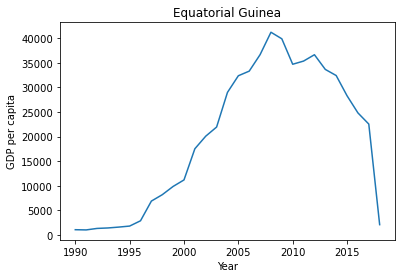

In [642]:
gdp_pivoted1 = gdp_pivoted.sort_values(by = ['Percent_Change'], ascending = False)
gdp_pivoted1.iloc[0].plot(kind = 'line')
plt.title('Equatorial Guinea')
plt.xlabel('Year')
plt.ylabel('GDP per capita')

In [643]:
gdp_pivoted1.iloc[1].name

'China'

Text(0, 0.5, 'GDP per capita')

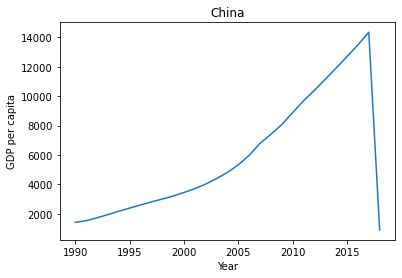

In [644]:
gdp_pivoted1.iloc[1].plot(kind = 'line')
plt.title(gdp_pivoted1.iloc[1].name)
plt.xlabel('Year')
plt.ylabel('GDP per capita')

Bonus: Put both line charts on the same plot.

Read in continents.csv contained in the data folder into a new dataframe called continents. We will be using this dataframe to add a new column to our dataset.

In [645]:
continents = pd.read_csv('continents.csv')

Merge gdp_df and continents. Keep only the countries that appear in both data frames. Save the result back to gdp_df.

In [646]:
print(gdp_df.shape)
print(continents.shape)

(6868, 3)
(216, 2)


In [647]:
print(gdp_df.columns)
print(continents.columns)

Index(['Country', 'Year', 'GDP_Per_Capita'], dtype='object')
Index(['Continent', 'Country'], dtype='object')


In [648]:
#inner merge
gdp_df = pd.merge(gdp_df, continents, on=["Country"])

Determine the number of countries per continent. Create a bar chart showing this.

Text(0, 0.5, '# of countries')

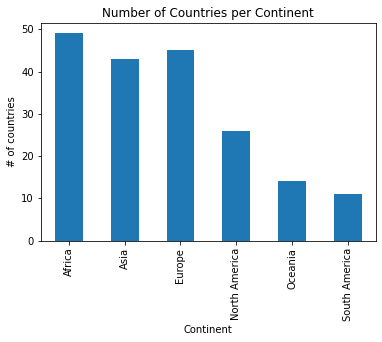

In [649]:
country_count_df = pd.DataFrame(gdp_df.groupby(by ='Continent').nunique())
country_count_df.iloc[:,0].plot(kind = 'bar')
plt.title('Number of Countries per Continent')
plt.xlabel('Continent')
plt.ylabel('# of countries')

Create a seaborn boxplot showing GDP per capita in 2014 split out by continent. What do you notice?

In [650]:
gdp_df_2014 = gdp_df[gdp_df['Year']==2014]
gdp_df_2014 = gdp_df_2014.iloc[:,[0,2,3]].set_index('Country')
gdp_df_2014 = gdp_df_2014.rename(columns={'Continent_y': 'Continent'})
gdp_df_2014.head()

,GDP_Per_Capita,Continent
Country,,
Afghanistan,2102.385234,Asia
Albania,11623.866679,Europe
Algeria,11512.705405,Africa
Angola,8239.828837,Africa
Antigua and Barbuda,18104.241470,North America


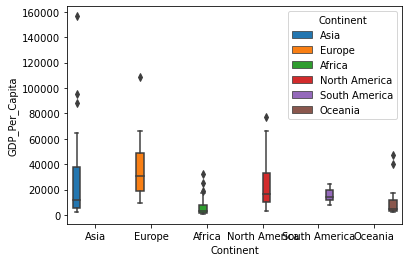

In [651]:
boxplot_2014 = sns.boxplot(data=gdp_df_2014, x="Continent", y="GDP_Per_Capita", 
                           hue = "Continent", saturation=0.95)
#boxplot_2014.set_xticklabels(labels="Continent", rotation = 30)

Download the full csv containing Life expectancy at birth, total (years) from https://data.worldbank.org/indicator/SP.DYN.LE00.IN?name_desc=false. Read this data into a DataFrame named life_expectancy.

In [652]:
life_expectancy = pd.read_csv('API_SP.DYN.LE00.IN_DS2_en_csv_v2_4553490.csv', skiprows=3)
life_expectancy.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
0,Aruba,ABW,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,65.662000,66.074000,66.444000,66.787000,67.113000,67.435000,...,75.441000,75.583000,75.725000,75.868000,76.010000,76.152000,76.293000,76.434000,NaN,NaN
1,Africa Eastern and Southern,AFE,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,42.716053,43.166935,43.603990,44.025617,44.432721,44.826919,...,60.953363,61.647367,62.259288,62.787681,63.246264,63.648988,64.005213,64.325702,NaN,NaN
2,Afghanistan,AFG,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,32.446000,32.962000,33.471000,33.971000,34.463000,34.948000,...,62.525000,62.966000,63.377000,63.763000,64.130000,64.486000,64.833000,65.173000,NaN,NaN
3,Africa Western and Central,AFW,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,37.205380,37.632546,38.052612,38.463746,38.867073,39.264841,...,55.618986,56.088269,56.542009,56.974761,57.382363,57.762347,58.115723,58.445953,NaN,NaN
4,Angola,AGO,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,37.524000,37.811000,38.113000,38.430000,38.760000,39.102000,...,58.054000,58.776000,59.398000,59.925000,60.379000,60.782000,61.147000,61.487000,NaN,NaN


Drop the Country Code, Indicator Name, and Indicator Code columns. Then use .melt() to convert your data from wide to long. That is, instead of having one row per country and multiple colums per year, we want to have multiple rows per country and a single column for year. After melting, rename the columns to Country, Year, and Life_Expectancy.

In [653]:
life_expectancy = life_expectancy.drop(columns=['Country Code','Indicator Name','Indicator Code','Unnamed: 66'])

In [654]:
life_expectancy = pd.melt(life_expectancy,id_vars =['Country Name'], var_name = 'Year', value_name = 'Life_Expectancy')
life_expectancy.rename(columns={'Country Name':'Country'}, inplace=True)
life_expectancy.head()

,Country,Year,Life_Expectancy
0,Aruba,1960,65.662000
1,Africa Eastern and Southern,1960,42.716053
2,Afghanistan,1960,32.446000
3,Africa Western and Central,1960,37.205380
4,Angola,1960,37.524000


What was the first country with a life expectancy to exceed 80? Japan in 1996

In [655]:
life_expectancy[life_expectancy['Life_Expectancy']>80].iloc[0]['Country']

'Japan'

Merge gdp_per_capita and life_expectancy, keeping all countries and years that appear in both DataFrames. Save the result to a new DataFrame named gdp_le. If you get any errors in doing this, read them carefully and correct them. Look at the first five rows of your new data frame to confirm it merged correctly. Also, check the last five rows to make sure the data is clean and as expected.

In [656]:
#Check if 'Unnamed: 66' is still in the dataset
life_expectancy[life_expectancy['Year'] == 'Unnamed: 66']

,Country,Year,Life_Expectancy


In [657]:
life_expectancy['Year'] = life_expectancy['Year'].astype('int64')
gdp_le = pd.merge(gdp_df, life_expectancy, how = 'inner', on = ['Country','Year'])
gdp_le.head()

,Country,Year,GDP_Per_Capita,Continent,Life_Expectancy
0,Afghanistan,2019,2065.036398,Asia,64.833
1,Afghanistan,2018,2033.779002,Asia,64.486
2,Afghanistan,2017,2058.383832,Asia,64.130
3,Afghanistan,2016,2057.062164,Asia,63.763
4,Afghanistan,2015,2068.265904,Asia,63.377


Create a new DataFrame, named gdp_le_2019 by extracting data for the year 2019 from gdp_le. How many countries have a life expectancy of at least 80 in 2019? 33 countries

In [658]:
gdp_le_2019 = gdp_le[gdp_le['Year']==2019]
gdp_le_2019[gdp_le_2019['Life_Expectancy']>=80].count()['Year']

33

Find the countries that had the top 3 largest GDP per capita figures for 2019. Create a seaborn FacetGrid showing the change in life expectancy over time for these three countries. Each individual figure in the facet grid will represent a single country.

In [659]:
gdp_le_2019 = gdp_le_2019.sort_values(by='GDP_Per_Capita', ascending = False)
Top_3_2019 = gdp_le_2019[:3]['Country']
list(Top_3_2019)

['Macao SAR, China', 'Luxembourg', 'Singapore']

In [660]:
gdp_le1 = gdp_le[gdp_le['Country'].isin(Top_3_2019)]

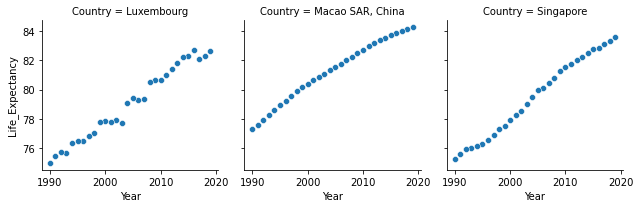

In [661]:
g = sns.FacetGrid(gdp_le1, col = 'Country')
g.map(sns.scatterplot, 'Year', 'Life_Expectancy')

Create a scatter plot of Life Expectancy vs GDP per Capita for the year 2019. What do you notice? weak positive correlation; logarithmic curve

<AxesSubplot:xlabel='GDP_Per_Capita', ylabel='Life_Expectancy'>

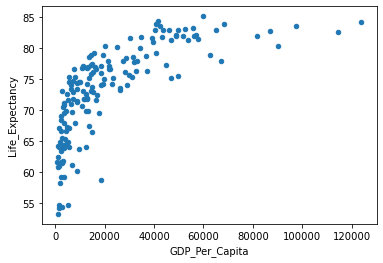

In [662]:
gdp_le_2019.plot(kind='scatter', x='GDP_Per_Capita', y='Life_Expectancy')

Find the correlation between Life Expectancy and GDP per Capita for the year 2019. What is the meaning of this number? Positively correlated 

In [663]:
gdp_le_2019['Life_Expectancy'].corr(gdp_le_2019['GDP_Per_Capita'])

0.7090182746006473

Add a column to gdp_le_2019 and calculate the logarithm of GDP per capita. Find the correlation between the log of GDP per capita and life expectancy. How does this compare to the calculation in the previous part? Stronger positive correlation

Look at a scatter plot to see if the result of this calculation makes sense.

In [664]:
gdp_le_2019['logarithm of GDP per capita'] = np.log(gdp_le_2019['GDP_Per_Capita'])
gdp_le_2019['Life_Expectancy'].corr(gdp_le_2019['logarithm of GDP per capita'])


0.8484975848006421

<AxesSubplot:xlabel='logarithm of GDP per capita', ylabel='Life_Expectancy'>

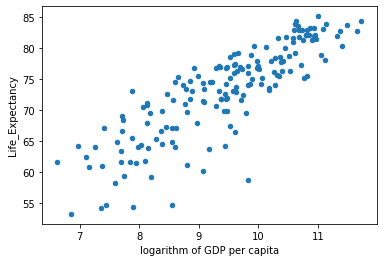

In [665]:
gdp_le_2019.plot(kind='scatter', x='logarithm of GDP per capita', y='Life_Expectancy')

Solo Exploration and Presentation:

Choose and download another data set from the UN data http://data.un.org/Explorer.aspx to explore. You may want to combine your new dataset with one or both of the datasets that you already worked with. Prepare a short (< 5 minute) presentation of your findings. Report any interesting correlations or trends that you find.
If time allows, check out the plotly library to add additional interativity to your plots. https://plotly.com/python/plotly-express/.

In [666]:
UN_Maritual = pd.read_excel('Marital status of men and women.xls', skiprows=3)
UN_Maritual = UN_Maritual.drop(columns=['ISO code','Period','Source type','Source','Survey Name','Non-standard age groups','Note on non-standard age groups','Note on marital status','Note on country or population','Note on data source','Note on age ','Unnamed: 26'])

In [667]:
UN_Maritual.head()

,Country,Year,Sex,Marital status,15-19,20-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-64,65+
0,Afghanistan,1973,Men,Single,92.2,67.3,38.5,16.9,8.8,5.7,3.7,1.7,1.4,2.0,1.6
1,Afghanistan,1973,Men,Married,7.6,31.9,59.1,78.9,87.2,89.7,90.7,91.5,91.5,85.4,78.3
2,Afghanistan,1973,Men,Widowed,0.1,0.7,2.3,3.9,3.9,4.3,5.6,6.8,7.0,12.5,19.9
3,Afghanistan,1973,Men,Divorced,0.0,0.0,0.0,0.2,0.1,0.1,0.0,0.0,0.0,0.0,0.1
4,Afghanistan,1973,Women,Single,49.5,11.9,3.7,1.6,1.0,1.3,0.5,1.7,1.0,0.9,2.5


In [668]:
#pd.unique(UN_Maritual['Country'])
len(pd.unique(UN_Maritual['Country']))
#pd.unique(df['height']

221

In [698]:
UN_Maritual_gdp_le = UN_Maritual.merge(gdp_df,on = ['Country','Year']).merge(life_expectancy,on = ['Country','Year'])
UN_Maritual_gdp_le.dropna()

,Country,Year,Sex,Marital status,15-19,20-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-64,65+,GDP_Per_Capita,Continent,Life_Expectancy
13,Albania,2001,Men,Single,99.1,86.3,45.1,14.7,5.5,3.2,2.3,1.9,1.8,1.9,1.9,6462.425658,Europe,74.288000
14,Albania,2001,Men,Married,0.9,13.6,54.6,84.8,93.7,95.8,96.5,96.4,95.5,93.8,86.4,6462.425658,Europe,74.288000
15,Albania,2001,Men,Widowed,0.0,0.1,0.2,0.2,0.4,0.4,0.7,1.2,2.3,3.9,11.3,6462.425658,Europe,74.288000
16,Albania,2001,Men,Divorced,0.0,0.1,0.2,0.3,0.4,0.5,0.5,0.5,0.4,0.4,0.4,6462.425658,Europe,74.288000
17,Albania,2001,Women,Single,90.4,50.0,19.4,8.3,4.6,3.4,2.7,1.9,1.6,1.5,1.8,6462.425658,Europe,74.288000
18,Albania,2001,Women,Married,9.5,49.3,79.1,89.6,92.3,92.3,91.4,89.2,84.2,75.7,46.4,6462.425658,Europe,74.288000
19,Albania,2001,Women,Widowed,0.1,0.4,0.9,1.4,2.0,3.0,4.6,7.8,13.4,21.9,51.1,6462.425658,Europe,74.288000
20,Albania,2001,Women,Divorced,0.1,0.3,0.7,0.8,1.1,1.2,1.3,1.1,0.9,0.8,0.7,6462.425658,Europe,74.288000
39,Albania,2011,Men,Single,98.0,90.2,61.0,26.3,11.1,5.4,3.1,2.2,1.6,1.2,1.4,11088.087801,Europe,76.914000
40,Albania,2011,Men,Married,1.9,9.6,38.5,72.7,87.6,93.2,95.4,96.0,96.1,95.4,87.1,11088.087801,Europe,76.914000


In [691]:
print(len(pd.unique(UN_Maritual_gdp_le['Country'])))

154


In [694]:
pd.unique(UN_Maritual_gdp_le['Year']).min()

1990

In [695]:
from dash import Dash, dcc, html, Input, Output
import plotly.express as px

In [700]:
#UN_Maritual_gdp_le.iloc[:, 4:15].fillna(0).head()
cols = UN_Maritual_gdp_le.columns[4:15]
UN_Maritual_gdp_le['avg'] = UN_Maritual_gdp_le[cols].fillna(0).astype(float).mean(axis=1)
UN_Maritual_gdp_le.head()
#fig = px.scatter(UN_Maritual_gdp_le, x='Year', y='GDP_Per_Capita', color='Marital status', facet_row='Country')
fig = px.histogram(UN_Maritual_gdp_le[UN_Maritual_gdp_le['Country'].isin(['Japan', 'China', 'Australia'])],
#fig = px.histogram(UN_Maritual_gdp_le[UN_Maritual_gdp_le['Country'].isin(UN_Maritual_gdp_le['Country'].unique()[:3])],
                   x='GDP_Per_Capita', y='25-29', color='Marital status', facet_row='Country', nbins=20)
fig.show()